In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


> # 1. **Task 4**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px
from collections import namedtuple

In [3]:
df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [4]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35197,35198,06/04/2020,Zacatecas,Mexico,2020-06-05 02:33:06,341.0,41.0,219.0
35198,35199,06/04/2020,Zakarpattia Oblast,Ukraine,2020-06-05 02:33:06,1257.0,28.0,524.0
35199,35200,06/04/2020,Zaporizhia Oblast,Ukraine,2020-06-05 02:33:06,469.0,14.0,269.0
35200,35201,06/04/2020,Zhejiang,Mainland China,2020-06-05 02:33:06,1268.0,1.0,1267.0


In [5]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86


In [6]:
df_recovered.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,803,812,823,851,857,872,877,891,898,898
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,676,676,681,684,692,694,698,733,735,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18


In [7]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,220,227,235,246,249,257,265,270,294,300
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,617,623,630,638,646,653,661,667,673,681
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [8]:
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values("Confirmed", ascending=False).reset_index()

,Country,Confirmed,Deaths,Recovered
0,US,73186457.0,4099256.0,12373835.0
1,Spain,14159654.0,1546118.0,7208634.0
2,Italy,13989037.0,1868580.0,5760192.0
3,UK,11634108.0,1616408.0,54687.0
4,Brazil,11310710.0,704282.0,4536215.0
...,...,...,...,...
218,North Ireland,1.0,0.0,0.0
219,Cape Verde,1.0,0.0,0.0
220,The Gambia,1.0,0.0,0.0
221,Republic of the Congo,1.0,0.0,0.0


In [9]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [10]:
df2

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0
...,...,...,...,...,...,...,...
18546,06/04/2020,Ukraine,Vinnytsia Oblast,35174,1077.0,16.0,677.0
18547,06/04/2020,Ukraine,Volyn Oblast,35180,986.0,29.0,294.0
18548,06/04/2020,Ukraine,Zakarpattia Oblast,35199,1257.0,28.0,524.0
18549,06/04/2020,Ukraine,Zaporizhia Oblast,35200,469.0,14.0,269.0


In [11]:
df.Country.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [12]:
#POUR USA 
df.query('Country=="US"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-23 17:00:00,1.0,0.0,0.0
2,2020-01-24 17:00:00,2.0,0.0,0.0
3,2020-01-25 17:00:00,2.0,0.0,0.0
4,2020-01-26 16:00:00,5.0,0.0,0.0
...,...,...,...,...
361,2020-06-01 02:32:46,1790172.0,104381.0,444758.0
362,2020-06-02 02:33:08,1811020.0,105149.0,458231.0
363,2020-06-03 02:33:13,1831821.0,106180.0,463868.0
364,2020-06-04 02:33:14,1851520.0,107175.0,479258.0


In [13]:
#POUR Tunisia
df.query('Country=="Tunisia"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-03-04 01:33:07,4.0,0.0,0.0
1,2020-03-08 05:31:00,977.0,27.0,8.0
2,2020-03-08 21:13:10,4.0,0.0,0.0
3,2020-03-10 05:13:07,5.0,0.0,0.0
4,2020-03-11 18:52:03,14.0,0.0,0.0
...,...,...,...,...
79,2020-06-01 02:32:46,1077.0,48.0,960.0
80,2020-06-02 02:33:08,1084.0,48.0,964.0
81,2020-06-03 02:33:13,1086.0,48.0,965.0
82,2020-06-04 02:33:14,1087.0,49.0,965.0


In [14]:
#POUR France
df.query('Country=="France"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-24 17:00:00,2.0,0.0,0.0
1,2020-01-25 17:00:00,3.0,0.0,0.0
2,2020-01-26 16:00:00,3.0,0.0,0.0
3,2020-01-27 23:59:00,3.0,0.0,0.0
4,2020-01-28 23:00:00,4.0,0.0,0.0
...,...,...,...,...
122,2020-06-01 02:32:46,189009.0,28805.0,68473.0
123,2020-06-02 02:33:08,189348.0,28836.0,68558.0
124,2020-06-03 02:33:13,188450.0,28943.0,68930.0
125,2020-06-04 02:33:14,192330.0,29024.0,69573.0


In [15]:
#Number of case comfirmed, death and recovred per date
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
...,...,...,...,...
05/31/2020,17909850,6166946.0,372035.0,2641329.0
06/01/2020,21831988,6265852.0,375543.0,2696009.0
06/02/2020,22239009,6378238.0,380250.0,2729527.0


In [16]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [19]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [20]:
fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

**analyse by country**

In [21]:
confirmed = df.groupby(['Date', 'Country']).sum()[['Confirmed']].reset_index()
deaths = df.groupby(['Date', 'Country']).sum()[['Deaths']].reset_index()
recovered = df.groupby(['Date', 'Country']).sum()[['Recovered']].reset_index()

In [22]:
latest_date = confirmed['Date'].max()
latest_date

'06/04/2020'

In [23]:
all_countries = confirmed['Country'].unique()
all_countries

array(['Hong Kong', 'Japan', 'Macau', 'Mainland China', 'South Korea',
       'Taiwan', 'Thailand', 'US', 'Australia', 'Brazil', 'Colombia',
       'Malaysia', 'Mexico', 'Philippines', 'Singapore', 'Vietnam',
       'France', 'Nepal', 'Canada', 'Cambodia', 'Ivory Coast',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'India',
       'Italy', 'Russia', 'Sweden', 'UK', 'Spain', 'Belgium', 'Others',
       'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Oman', 'Algeria', 'Austria', 'Croatia',
       'Switzerland', 'Georgia', 'Greece', 'North Macedonia', 'Norway',
       'Pakistan', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Armenia', 'Azerbaijan', 'Czech Republic',
       'Dominican Republic', 'Ecuador', 'Andorra', 'Indonesia', 'Latvia',
       'Morocco'

In [24]:
print("Number of countries/regions with cases: " + str(len(all_countries)))
print("Countries/Regions with cases: ")
for i in all_countries:
    print("    " + str(i))

Number of countries/regions with cases: 223
Countries/Regions with cases: 
    Hong Kong
    Japan
    Macau
    Mainland China
    South Korea
    Taiwan
    Thailand
    US
    Australia
    Brazil
    Colombia
    Malaysia
    Mexico
    Philippines
    Singapore
    Vietnam
    France
    Nepal
    Canada
    Cambodia
    Ivory Coast
    Sri Lanka
    Germany
    Finland
    United Arab Emirates
    India
    Italy
    Russia
    Sweden
    UK
    Spain
    Belgium
    Others
    Egypt
    Iran
    Israel
    Lebanon
    Iraq
    Afghanistan
    Bahrain
    Kuwait
    Oman
    Algeria
    Austria
    Croatia
    Switzerland
    Georgia
    Greece
    North Macedonia
    Norway
    Pakistan
    Romania
    Denmark
    Estonia
    Netherlands
    San Marino
     Azerbaijan
    Belarus
    Iceland
    Lithuania
    New Zealand
    Nigeria
    North Ireland
    Ireland
    Luxembourg
    Monaco
    Qatar
    Armenia
    Azerbaijan
    Czech Republic
    Dominican Republic
    Ecuador
 

In [25]:
confirmed2 = confirmed.copy()
deaths2 = deaths.copy()
recovered2 = recovered.copy()
bubble_plot_dfs = [confirmed2, deaths2, recovered2]
for df_ in bubble_plot_dfs:
    df_["Country"].replace({'Mainland China': 'China'}, inplace=True)
    df_["Country"].replace({'UK': 'United Kingdom'}, inplace=True)
    df_["Country"].replace({'US': 'United States'}, inplace=True)

In [26]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
confirmed2["iso_alpha"] = confirmed2["Country"].map(countries.get)
deaths2["iso_alpha"] = deaths2["Country"].map(countries.get)
recovered2["iso_alpha"] = recovered2["Country"].map(countries.get)

In [27]:
plot_data_confirmed = confirmed2[["iso_alpha","Confirmed", "Country"]]
plot_data_deaths = deaths2[["iso_alpha","Deaths"]]
plot_data_recovered = recovered2[["iso_alpha","Recovered"]]

In [28]:
fig = px.scatter_geo(plot_data_confirmed, locations="iso_alpha", color="Country",
                     hover_name="iso_alpha", size="Confirmed",
                     projection="natural earth", title = 'Worldwide Confirmed Cases')
fig.show()

In [29]:
fig = px.scatter_geo(plot_data_deaths, locations="iso_alpha", color="Deaths",
                     hover_name="iso_alpha", size="Deaths",
                     projection="natural earth", title="Worldwide Death Cases")
fig.show()

In [30]:
fig = px.scatter_geo(plot_data_recovered, locations="iso_alpha", color="Recovered",
                     hover_name="iso_alpha", size="Recovered",
                     projection="natural earth", title="Worldwide Recovered Cases")
fig.show()

**Data preparation for forecasting**

In [31]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [32]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [33]:
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


**Forecasting Total Number of Cases Worldwide**

In [34]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=85)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

,ds
215,2020-08-24
216,2020-08-25
217,2020-08-26
218,2020-08-27
219,2020-08-28


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
215,2020-08-24,1.447990e+07,1.220301e+07,1.670135e+07
216,2020-08-25,1.457574e+07,1.223843e+07,1.684368e+07
217,2020-08-26,1.467631e+07,1.230873e+07,1.700262e+07
218,2020-08-27,1.477920e+07,1.235684e+07,1.717480e+07
219,2020-08-28,1.487772e+07,1.241528e+07,1.728720e+07


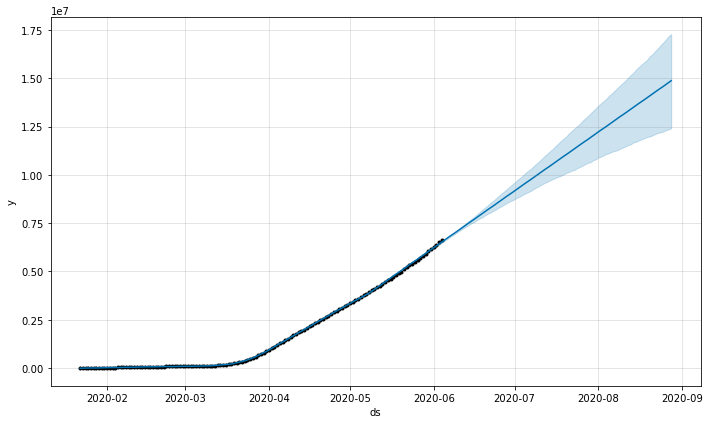

In [36]:
confirmed_forecast_plot = m.plot(forecast)

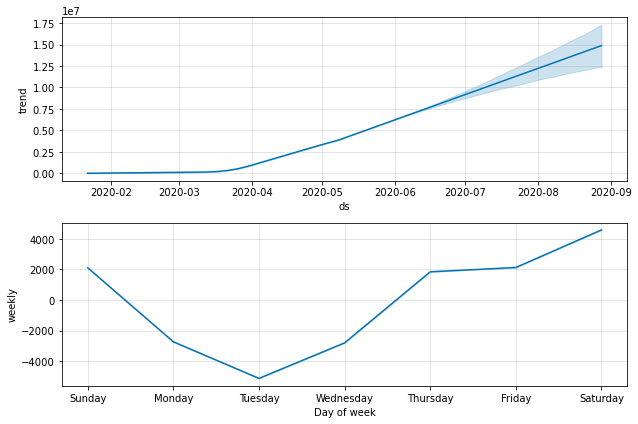

In [37]:
forecast_components = m.plot_components(forecast)

**Forecasting Deaths Worldwide**

In [38]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [39]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=85)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail()

,ds
215,2020-08-24
216,2020-08-25
217,2020-08-26
218,2020-08-27
219,2020-08-28


In [40]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
215,2020-08-24,734121.224822,510606.202424,951687.148167
216,2020-08-25,738474.777722,511061.667859,959895.913503
217,2020-08-26,743330.498993,512116.304315,969152.097016
218,2020-08-27,748043.529548,512740.540305,979886.453044
219,2020-08-28,752599.033171,513419.565342,986313.103155


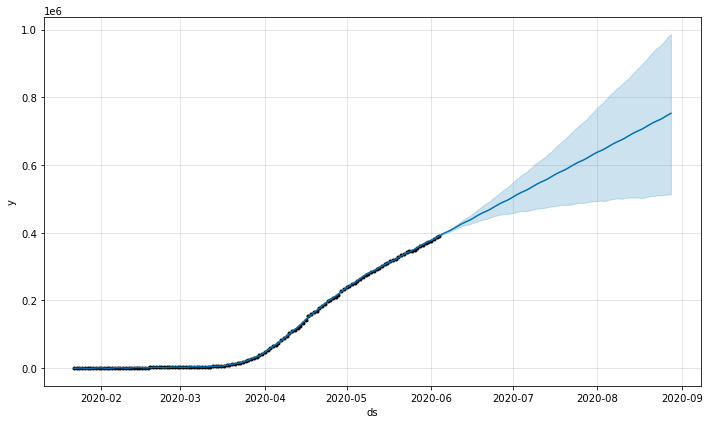

In [41]:
deaths_forecast_plot = m.plot(forecast)

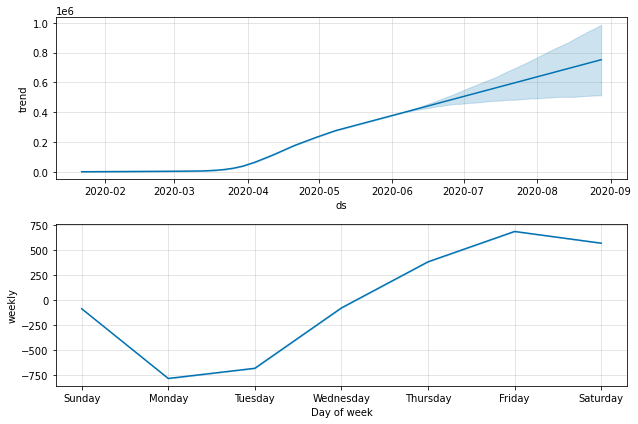

In [42]:
forecast_components = m.plot_components(forecast)

**Forecasting Recovered Cases Worldwide**

In [43]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [44]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=85)
future_recovered = future.copy() # for non-baseline predictions later on
future.tail()

,ds
215,2020-08-24
216,2020-08-25
217,2020-08-26
218,2020-08-27
219,2020-08-28


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
215,2020-08-24,7.456963e+06,6.355199e+06,8.561987e+06
216,2020-08-25,7.511654e+06,6.381553e+06,8.643248e+06
217,2020-08-26,7.572044e+06,6.449301e+06,8.708270e+06
218,2020-08-27,7.629522e+06,6.477038e+06,8.795721e+06
219,2020-08-28,7.688510e+06,6.528854e+06,8.879331e+06


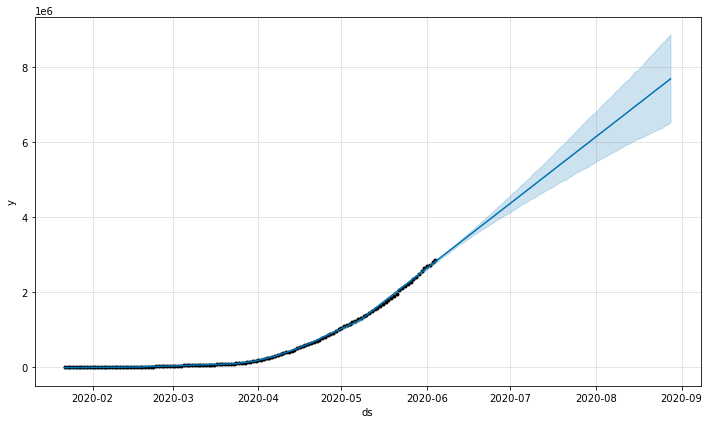

In [46]:
recovered_forecast_plot = m.plot(forecast)

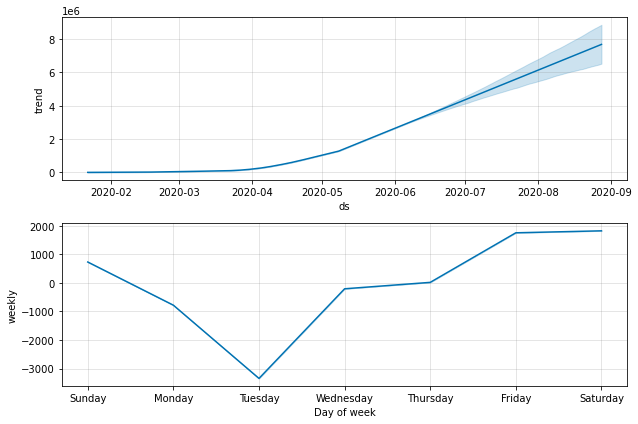

In [47]:
forecast_components = m.plot_components(forecast)

**Forecasting Confirmed, Death & Recovered Cases**

In [48]:
days_to_forecast = 85 # changable
first_forecasted_date = sorted(list(set(df['Date'].values)))[-days_to_forecast]

print('The first date to perform forecasts for is: ' + str(first_forecasted_date))

The first date to perform forecasts for is: 03/12/2020


In [49]:
confirmed_df = df[['SNo', 'Date','Province/State', 'Country', 'Confirmed']]
confirmed_df

,SNo,Date,Province/State,Country,Confirmed
0,1,01/22/2020,Anhui,Mainland China,1.0
1,2,01/22/2020,Beijing,Mainland China,14.0
2,3,01/22/2020,Chongqing,Mainland China,6.0
3,4,01/22/2020,Fujian,Mainland China,1.0
4,5,01/22/2020,Gansu,Mainland China,0.0
...,...,...,...,...,...
35197,35198,06/04/2020,Zacatecas,Mexico,341.0
35198,35199,06/04/2020,Zakarpattia Oblast,Ukraine,1257.0
35199,35200,06/04/2020,Zaporizhia Oblast,Ukraine,469.0
35200,35201,06/04/2020,Zhejiang,Mainland China,1268.0


In [50]:
deaths_df = df[['SNo', 'Date','Province/State', 'Country', 'Deaths']]
deaths_df

,SNo,Date,Province/State,Country,Deaths
0,1,01/22/2020,Anhui,Mainland China,0.0
1,2,01/22/2020,Beijing,Mainland China,0.0
2,3,01/22/2020,Chongqing,Mainland China,0.0
3,4,01/22/2020,Fujian,Mainland China,0.0
4,5,01/22/2020,Gansu,Mainland China,0.0
...,...,...,...,...,...
35197,35198,06/04/2020,Zacatecas,Mexico,41.0
35198,35199,06/04/2020,Zakarpattia Oblast,Ukraine,28.0
35199,35200,06/04/2020,Zaporizhia Oblast,Ukraine,14.0
35200,35201,06/04/2020,Zhejiang,Mainland China,1.0


In [51]:
recovered_df = df[['SNo', 'Date','Province/State', 'Country', 'Recovered']]
recovered_df

,SNo,Date,Province/State,Country,Recovered
0,1,01/22/2020,Anhui,Mainland China,0.0
1,2,01/22/2020,Beijing,Mainland China,0.0
2,3,01/22/2020,Chongqing,Mainland China,0.0
3,4,01/22/2020,Fujian,Mainland China,0.0
4,5,01/22/2020,Gansu,Mainland China,0.0
...,...,...,...,...,...
35197,35198,06/04/2020,Zacatecas,Mexico,219.0
35198,35199,06/04/2020,Zakarpattia Oblast,Ukraine,524.0
35199,35200,06/04/2020,Zaporizhia Oblast,Ukraine,269.0
35200,35201,06/04/2020,Zhejiang,Mainland China,1267.0


In [52]:
def make_forecasts(all_countries, confirmed_df, deaths_df, recovered_df, days_to_forecast, first_forecasted_date, mode):
    forecast_dfs = []
    absolute_errors = [] # collate absolute errors so that we can find MAE later on
    counter = 0 # arbitrary counter to output snippet of result_val_df only once, when it is 1
    for country in all_countries:
        try:
            assert(country in confirmed_df['Country'].values)
            print('Country ' + str(country) + ' is listed! ')
            country_confirmed_df = confirmed_df[(confirmed_df['Country'] == country)]
            country_deaths_df = deaths_df[(deaths_df['Country'] == country)]
            country_recovered_df = recovered_df[(recovered_df['Country'] == country)]
            country_dfs = [('Confirmed', country_confirmed_df), 
                           ('Deaths', country_deaths_df), 
                           ('Recovered', country_recovered_df)]
            states_in_country = country_confirmed_df['Province/State'].unique()
            for state in states_in_country:
                try:
                    state_dfs = [] # to store forecasts for Confirmed, Deaths and Recovered

                    assert(state in country_confirmed_df['Province/State'].values)

                    # make forecasts for each case type (Confirmed, Deaths, Recovered)
                    for country_df_tup in country_dfs:
                        case_type = country_df_tup[0]
                        country_df = country_df_tup[1]
                        state_df = country_df[(country_df['Province/State'] == state)]

                        # data preparation for forecast with Prophet at state level
                        state_df = state_df[['Date', case_type]]
                        state_df.columns = ['ds','y']
                        state_df['ds'] = pd.to_datetime(state_df['ds'])

                        state_df_val = state_df[(state_df['ds'] >= pd.to_datetime(first_forecasted_date))] # validation set
                        state_df = state_df[(state_df['ds'] < pd.to_datetime(first_forecasted_date))] # train set

                        if mode == 'default':
                            m = Prophet()
                        elif mode == 'custom':
                            m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
                            m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
                            m.add_seasonality(name='weekly', period=7, fourier_order=21)
                            m.add_seasonality(name='daily', period=1, fourier_order=3)
                        m.fit(state_df)
                        future = m.make_future_dataframe(periods=days_to_forecast)
                        forecast = m.predict(future)

                        # evaluate forecasts with validation set and save absolute errors to absolute_errors
                        forecast_df = forecast[['ds', 'yhat']]
                        result_df = forecast_df[(forecast_df['ds'] >= pd.to_datetime(first_forecasted_date))]
                        result_val_df = result_df.merge(state_df_val, on=['ds'])
                        result_val_df['abs_diff'] = (result_val_df['y'] - result_val_df['yhat']).abs()
                        absolute_errors += list(result_val_df['abs_diff'].values)

                        # the following allows the user to check the output at particular checkpoints. Feel free to change!
                        if counter == 1:
                            print('Printing snippet of result_val_df: \n')
                            print(result_val_df)
                            print(absolute_errors)
                        counter += 1

                        # save results to dataframe
                        forecast_df['Province/State'] = state
                        forecast_df['Country/Region'] = country
                        forecast_df.rename(columns={'yhat':case_type}, inplace=True)
                        state_dfs += [forecast_df.tail(days_to_forecast)]

                    merged_df = state_dfs[0].merge(state_dfs[1],on=['ds', 'Province/State', 'Country/Region']).merge(state_dfs[2],on=['ds', 'Province/State', 'Country/Region'])
                    forecast_dfs += [merged_df]
                except:
                    continue
        except:
            print('Country ' + str(country) + ' is not listed! ')
            continue
    results_tup = namedtuple('results_tup', ['forecast_dfs', 'absolute_errors'])
    return results_tup(forecast_dfs, absolute_errors)

In [53]:
#forecast_results = make_forecasts(all_countries, confirmed_df, deaths_df, recovered_df, days_to_forecast, first_forecasted_date, 'default')
#absolute_errors = forecast_results.absolute_errors

In [54]:
#forecast_results.forecast_dfs[0].tail(days_to_forecast) # example of a forecast